<a href="https://colab.research.google.com/github/ishika-mittal/Stock-Prices-Analytics-Dashboard/blob/main/Relative_Strength_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **I3: Relative Strength Index (RSI)**

1. It's a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions.

2. Generally, an asset is considered overbought when the RSI is > 70% and oversold when it's < 30%

Details: https://www.investopedia.com/terms/r/rsi.asp

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installing yfinance library for fetching historical stock data
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3MB 8.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=a478d363407033cc54747ed28f416f34cd529bbbbdffeed5fe34cb55de476f71
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#Function to get the stock data
def stock_data(stock, start_date, end_date):

    tickerSymbol = stock

    #get data on this ticker
    tickerData = yf.Ticker(tickerSymbol)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)

    return tickerDf

In [4]:
#Fetching a 1Y dataset for better representation

df = stock_data("ITC.BO", "2020-06-08", "2021-06-08")
df.reset_index(level="Date", inplace=True)
df.drop(columns = ['Dividends', 'Stock Splits'], inplace=True)

print(df.shape)
df.head()

(250, 6)


,Date,Open,High,Low,Close,Volume
0,2020-06-08,182.945035,184.074883,178.199672,178.742004,744734
1,2020-06-09,179.826649,186.289389,178.696801,179.510300,1341970
2,2020-06-10,180.052627,183.668142,179.284339,180.097824,1024793
3,2020-06-11,180.775730,181.905578,174.990912,175.894791,855456
4,2020-06-12,171.375387,176.482296,169.974373,175.352448,980250


In [5]:
#Creating a dataset with only Closing Price column and Date as index

data = df.sort_index(ascending=True,axis=0)
df1 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    df1["Date"][i]=data['Date'][i]
    df1["Close"][i]=data["Close"][i]

df1.index=df1.Date
df1.drop("Date",axis=1,inplace=True)
print(df1.shape)
df1.head()

(250, 1)


,Close
Date,
2020-06-08,178.742
2020-06-09,179.51
2020-06-10,180.098
2020-06-11,175.895
2020-06-12,175.352


In [6]:
#Defining Function

def get_RSI(data):
  
  data1 = data
  diff = data1['Close'].diff()
    
  #Up change is equal to the positive difference, otherwise equal to zero
  Up = diff.clip(lower=0)
  #Down change is equal to negative deifference, otherwise equal to zero
  Down = -1*diff.clip(upper=0)

  Up_Change_Avg = Up.ewm(com = 13, adjust = False).mean()
  Down_Change_Avg = Down.ewm(com = 13, adjust = False).mean()

  Relative_Strength = (Up_Change_Avg/Down_Change_Avg)
  RSI = 100 - (100/(1+Relative_Strength))
  data['RSI'] = RSI 

  return data

In [7]:
#Implementing the function
get_RSI(df1)
df1.head()

,Close,RSI
Date,,
2020-06-08,178.742,NaN
2020-06-09,179.51,100.000000
2020-06-10,180.098,100.000000
2020-06-11,175.895,70.027602
2020-06-12,175.352,67.227558


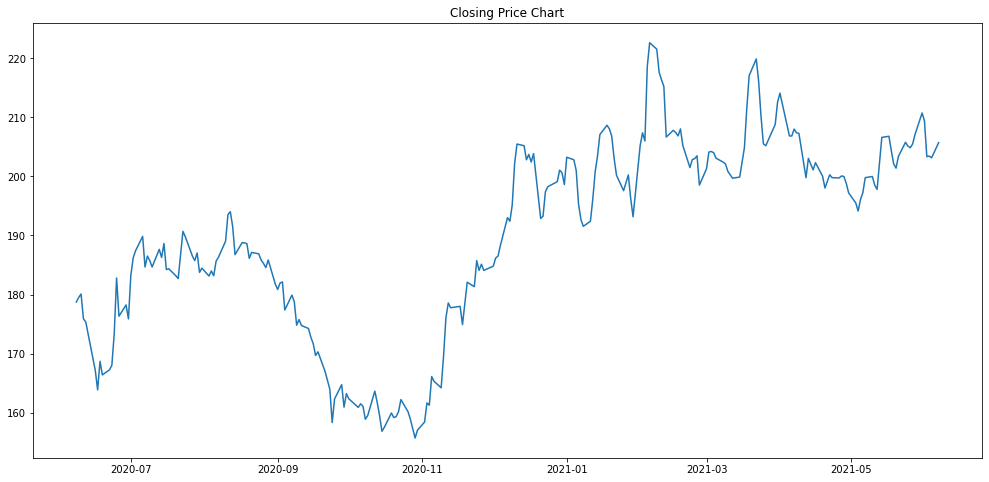

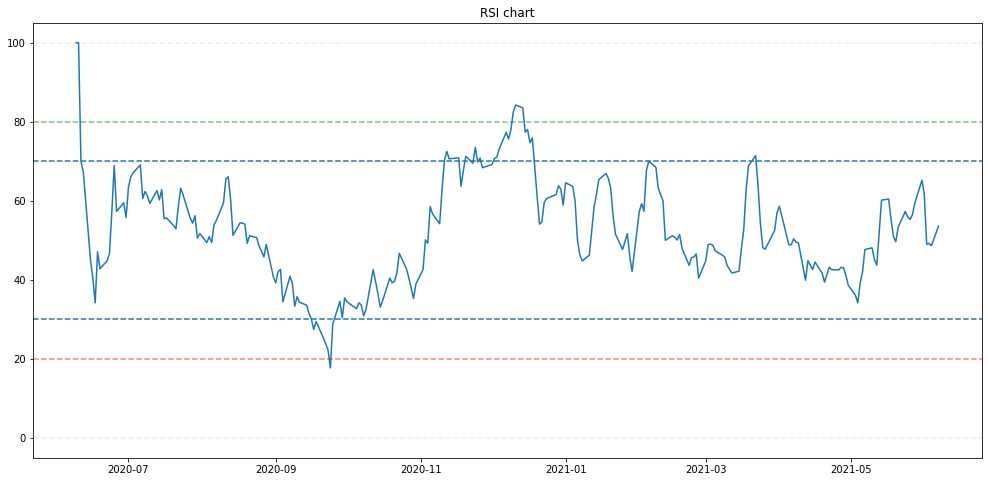

In [8]:
#Plotting RSI 

#Plotting Closing Price
plt.figure(figsize=(17,8))
plt.plot(df1['Close'])
plt.title('Closing Price Chart')
plt.show()

#Plotting corresponding RSI values and significant levels
plt.figure(figsize=(17,8))
plt.title('RSI chart')
plt.plot(df1['RSI'])

#Significant Level A
plt.axhline(0, linestyle='--', alpha=0.1, color = 'g')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'r')
plt.axhline(30, linestyle='--')

#Significant Level B
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'g')
plt.axhline(100, linestyle='--', alpha=0.1, color = 'r')
plt.show()